In [1]:
import numpy as np
from matplotlib import pyplot



## Functions

In [4]:
class Function:
    @staticmethod
    def sphere(x, y):
        return x**2 + y**2

    @staticmethod
    def schwefel(x, y):
        term_x = x * np.sin(np.sqrt(np.abs(x)))
        term_y = y * np.sin(np.sqrt(np.abs(y)))
        return 418.9829 * 2 - (term_x + term_y)

    @staticmethod
    def rosenbrock(x, y):
        return (1 - x)**2 + 100 * (y - x**2)**2

    @staticmethod
    def rastrigin(x, y):
        term = 10 * (np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y))
        return x**2 + y**2 - term + 20

    @staticmethod
    def griewangk(x, y):
        left = (x**2 + y**2) / 4000
        right = np.cos(x / np.sqrt(2)) * np.cos(y / np.sqrt(2))
        return left - right + 1

    @staticmethod
    def levy(x, y):
        sin_3pi_x = np.sin(3 * np.pi * x)
        sin_3pi_y = np.sin(3 * np.pi * y)
        return sin_3pi_x**2 + (x - 1)**2 * (1 + sin_3pi_y**2) + (y - 1)**2 * (1 + np.sin(2 * np.pi * y)**2)

    @staticmethod
    def michalewicz(x, y):
        sin_x = np.sin(x)
        sin_y = np.sin(y)
        return -1 * (sin_x * np.sin((1 * x**2) / np.pi)**20 + sin_y * np.sin((2 * y**2) / np.pi)**20)

    @staticmethod
    def zakharov(x, y):
        term = 0.5 * x + y
        return x**2 + y**2 + term**2 + term**4

    @staticmethod
    def ackley(x, y):
        term_1 = -0.2 * np.sqrt(0.5 * (x**2 + y**2))
        term_2 = np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y)
        return -20 * np.exp(term_1) - np.exp(0.5 * term_2) + np.e + 20


## Solution

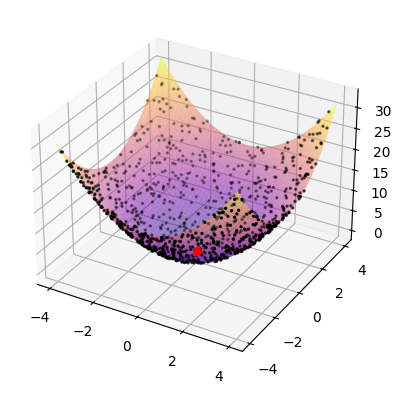

In [15]:
LOWER_BOUND = -4.0
UPPER_BOUND = 4.0
POINT_SPACING = 0.01
DIMENSION = "3d"

class Solution:
    def __init__(self, dimension:str=DIMENSION, lower_bound:float=LOWER_BOUND, upper_bound:float=UPPER_BOUND, point_spacing:float=POINT_SPACING, function=None):
        self.dimension = dimension
        self.lower_bound = lower_bound  
        self.upper_bound = upper_bound
        self.function = function
        # Points in given range
        self.raw_points = np.arange(self.lower_bound, self.upper_bound, point_spacing)
        # Create meshgrid - matrices from X and Y points
        self.surface_x, self.surface_y = np.meshgrid(self.raw_points, self.raw_points)
        # Generate Z coordinate from given function
        self.surface_z = self.function(self.surface_x, self.surface_y)
        self.init_plot()

    def init_plot(self):
        self.figure = pyplot.figure(figsize=(16,10))
        self.plot = self.figure.add_subplot(131, projection=self.dimension, computed_zorder=False)
        self.plot.plot_surface(self.surface_x, self.surface_y, self.surface_z, cmap='plasma', alpha=0.5, zorder=1)

    def plot_points(self, points, color="black", size:int=2, zorder:int=2):
        # Extract x, y, z coordinates from points
        x_points, y_points, z_points = zip(*points)
        self.plot.scatter(x_points, y_points, z_points, c=color, s=size, zorder=zorder)

    def _generate_random_point(self):
        """Generates a random point (x, y, z) within the specified bounds."""
        x = np.random.uniform(self.lower_bound, self.upper_bound)
        y = np.random.uniform(self.lower_bound, self.upper_bound)
        z = self.function(x, y)
        return (x, y, z)

    def blind_search(self, generations:int, children_per_generation:int):
        # Generate random first point and set it as best
        best_point = self._generate_random_point()
        all_points = []

        # Create generations
        for _ in range(generations):
            generation = []

            # Each generation creates another points and selects the best one
            generation = [self._generate_random_point() for _ in range(children_per_generation)]
            all_points.extend(generation)


            # Select the best point in the generation
            current_best = min(generation, key=lambda p: p[2])
            if current_best[2] < best_point[2]:
                best_point = current_best

        # Return all points and best one
        return best_point, all_points



solution = Solution(DIMENSION, LOWER_BOUND, UPPER_BOUND, POINT_SPACING, Function.sphere)

best_point, all_points = solution.blind_search(200,5)

solution.plot_points(all_points, color='black', size=2, zorder=2)
solution.plot_points([best_point], color='red', size=30, zorder=3)

pyplot.show()





